In [2]:
import sys
sys.path.append('..')

## RPCA

In [12]:
import numpy

import matplotlib.style
import matplotlib.pyplot

import lasp.admm
import lasp.utils
import lasp.metrics
import lasp.noise

In [13]:
# matplotlib.rcParams['text.color'] = (1.0, 1.0, 1.0)
matplotlib.style.use(['dark_background'])


In [14]:
def make_onezero_image(size: int, tau: float) -> numpy.ndarray:
    nb_pixel_to_one = int(tau*size*size)
    d: numpy.ndarray = numpy.zeros(shape=size*size)
    d[0:nb_pixel_to_one] = 1
    d = numpy.random.permutation(d)
    return d.reshape((size, size))

def make_low_rank_image(size: int) -> numpy.ndarray:
    d: numpy.ndarray = numpy.zeros(shape=(size, size))
    for i in range(0, size, 2):
        d[:, i] = 1
    return d

In [15]:
size = 10
sparse_image = make_onezero_image(size, tau=0.2)
low_rank_image = make_low_rank_image(size)
image = low_rank_image + sparse_image

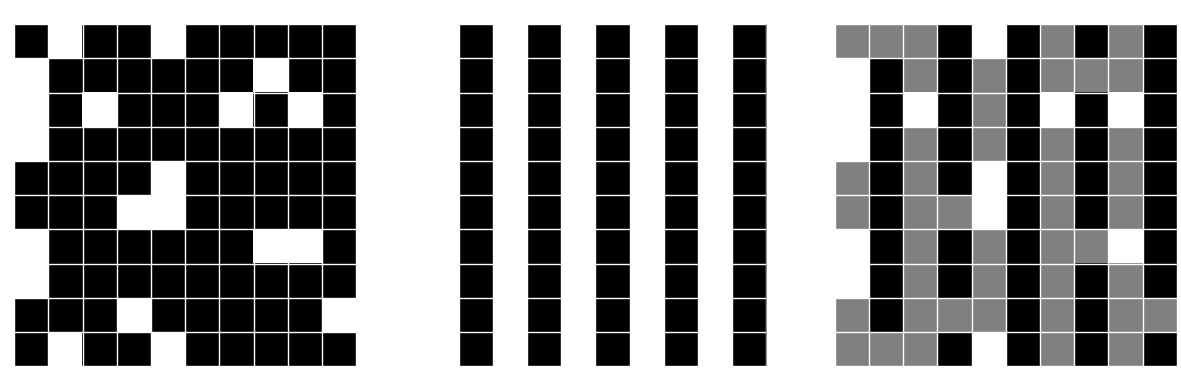

In [16]:
def grid_on_image() -> None:

    matplotlib.pyplot.axis('on')
    ax: matplotlib.pyplot.Axes = matplotlib.pyplot.gca()

    # Major ticks
    ax.set_xticks(numpy.arange(0, 10, 1))
    ax.set_yticks(numpy.arange(0, 10, 1))

    # Labels for major ticks
    # ax.set_xticklabels(numpy.arange(1, 11, 1))
    # ax.set_yticklabels(numpy.arange(1, 11, 1))

    # Minor ticks
    ax.set_xticks(numpy.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(numpy.arange(-.5, 10, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)


figure = matplotlib.pyplot.figure(figsize=(30, 30), dpi=50)
# figure.set_facecolor(color=(0.1, 0.2, 0.5))
# figure.set_edgecolor()

fontsize = 30
# figure.suptitle(t='Initial image ', fontsize = fontsize)

matplotlib.pyplot.subplot(1, 3, 1)
matplotlib.pyplot.title(label='Sparse image', fontsize = fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(sparse_image, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 2)
matplotlib.pyplot.title(label='Low rank image', fontsize = fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(low_rank_image, cmap='gray')

matplotlib.pyplot.subplot(1, 3, 3)
matplotlib.pyplot.title(label='sparse + low rank', fontsize = fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(image, cmap='gray')



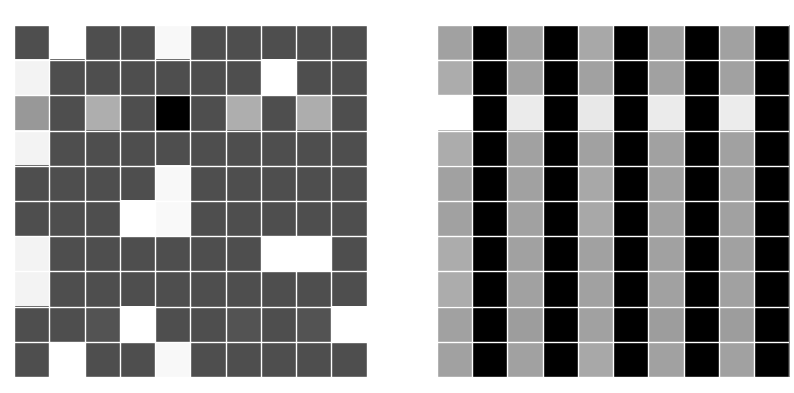

In [19]:
m, n = image.shape
lamda = 1/numpy.sqrt(max(m, n))
mu = 10*lamda
b, t = lasp.admm.rpca(image, lamda, mu, nb_iterations=25)

figure = matplotlib.pyplot.figure(figsize=(20, 20), dpi=50)

# b_int = numpy.array(b, numpy.int8)
matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.title(label='Sparse image', fontsize=fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(b, cmap='gray')

# t_int = numpy.array(t, numpy.int8)
matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.title(label='Low rank image', fontsize=fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(t, cmap='gray')

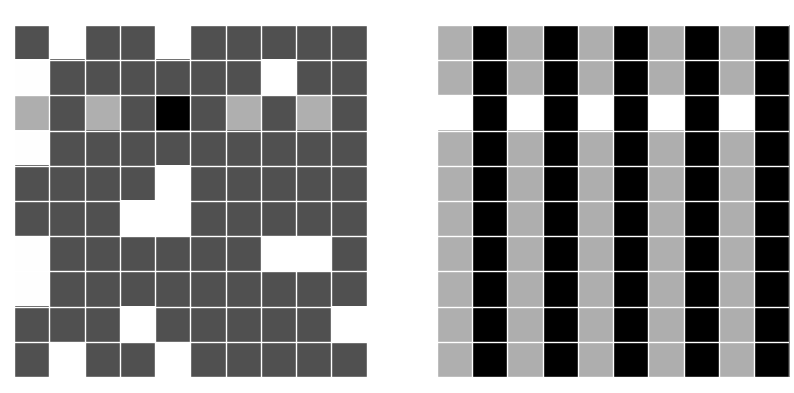

In [20]:
m, n = image.shape
lamda = 1/numpy.sqrt(max(m, n))
mu = 10*lamda
b, t = lasp.admm.rpca(image, lamda, mu, nb_iterations=35)

figure = matplotlib.pyplot.figure(figsize=(20, 20), dpi=50)

# b_int = numpy.array(b, numpy.int8)
matplotlib.pyplot.subplot(1, 2, 1)
matplotlib.pyplot.title(label='Sparse image', fontsize=fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(b, cmap='gray')

# t_int = numpy.array(t, numpy.int8)
matplotlib.pyplot.subplot(1, 2, 2)
matplotlib.pyplot.title(label='Low rank image', fontsize=fontsize)
grid_on_image()
_ = matplotlib.pyplot.imshow(t, cmap='gray')

In [18]:
# """
# N=5
# N2 = N²
# d = ones(1, N2)
# ind = randperm(N2)
# d(ind(1:5)) = 0
# K = diag(d)
# x = x(:)
# b = Kx
# """


# def f(x: numpy.ndarray, tau: float) -> numpy.ndarray:
#     n, m = x.shape
#     nb_pixel_to_zero = int(tau*x.shape[0]*x.shape[1])
#     d: numpy.ndarray = numpy.ones(shape=n*m)
#     d[0:nb_pixel_to_zero] = 0
#     d = numpy.random.permutation(d)
#     K = numpy.diag(d)
    
#     x_reshape = x.reshape(n*m, 1)
#     b: numpy.ndarray = K @ x_reshape

#     return b.reshape(m, n)




# x = numpy.ones(shape=(10, 10))

# matplotlib.pyplot.imshow(f(x, tau=0.36))

In [20]:
# """
# N=5
# N2 = N²
# d = ones(1, N2)
# ind = randperm(N2)
# d(ind(1:5)) = 0
# K = diag(d)
# x = x(:)
# b = Kx
# """


# def f(x: numpy.ndarray, tau: float) -> numpy.ndarray:
#     n, m = x.shape
#     nb_pixel_to_zero = int(tau*x.shape[0]*x.shape[1])
#     d: numpy.ndarray = numpy.ones(shape=n*m)
#     d[0:nb_pixel_to_zero] = 0
#     d = numpy.random.permutation(d)
#     K = numpy.diag(d)
    
#     x_reshape = x.reshape(n*m, 1)
#     b: numpy.ndarray = K @ x_reshape

#     return b.reshape(m, n)




# x = numpy.ones(shape=(10, 10))

# matplotlib.pyplot.imshow(f(x, tau=0.36))